In [66]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [4]:
df_survive=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [9]:
df_survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_survive.shape

(891, 12)

It have 891 rows and 12 columns

here the important columns is survived column and it is our target columnn 

In [6]:
df_survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# lets see for any null values are present in the dataset
df_survive.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing data:
As we can observe that in Cabin column number of missiog values are highest and we cannot fulfill it with mean method also so we need to drop the column

In [12]:
df_survive=df_survive.drop(columns='Cabin' ,axis=1)

In [15]:
#replacing the missing the values  in age with mean age 
df_survive['Age'].fillna(df_survive['Age'].mean(), inplace=True)

In [19]:
# finding the mode of the 'Embarked' column
print(df_survive['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [20]:
print(df_survive['Embarked'].mode()[0])

S


In [21]:
# Replacing the date from mode and filling the missing values
df_survive['Embarked'].fillna(df_survive['Embarked'].mode()[0],inplace=True)

In [22]:
# checking the missing values
df_survive.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
# lets see some statistical date
df_survive.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see here that Age and fare are the numerical data

In [29]:
#finding the number of passengers survived and not survived
df_survive['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Count')

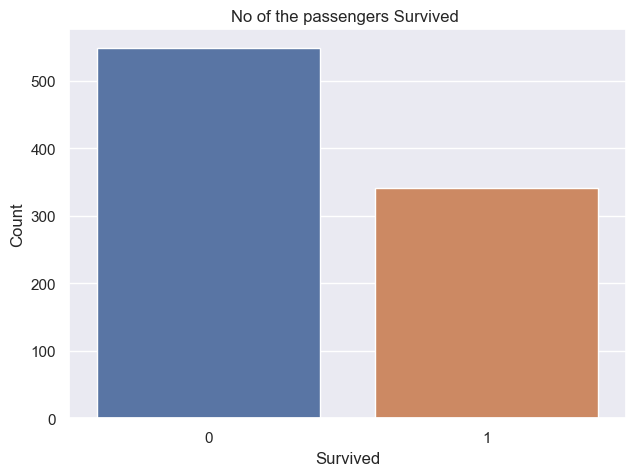

In [37]:
#lets make a count plot for 'Survived'

sns.countplot(x='Survived', data=df_survive)
plt.title('No of the passengers Survived ')
plt.xlabel('Survived')
plt.ylabel('Count')

here 0 is passengers who are dead and 1 is considerd as passengers survived

In [38]:
#finding the number of male and female passengers on titanic 
df_survive['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0, 0.5, 'Count')

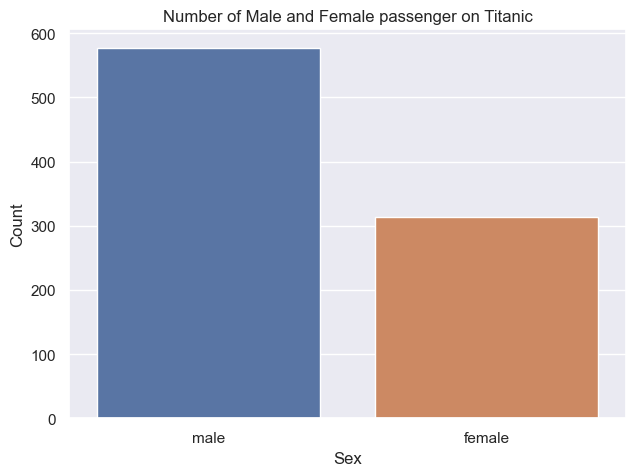

In [39]:
# lets make the count plot
sns.countplot(x='Sex',data=df_survive)

plt.title("Number of Male and Female passenger on Titanic")
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

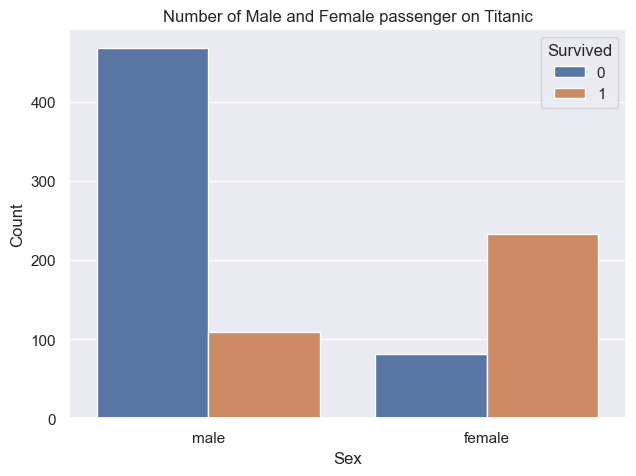

In [42]:
#now lets make countplot according to the sex of the passengers
sns.countplot(x='Sex' , hue='Survived' , data=df_survive)

plt.title("Number of Male and Female passenger on Titanic")
plt.xlabel('Sex')
plt.ylabel('Count')


here we can observe that number of female survivors are more than the male survivors

Text(0, 0.5, 'Count')

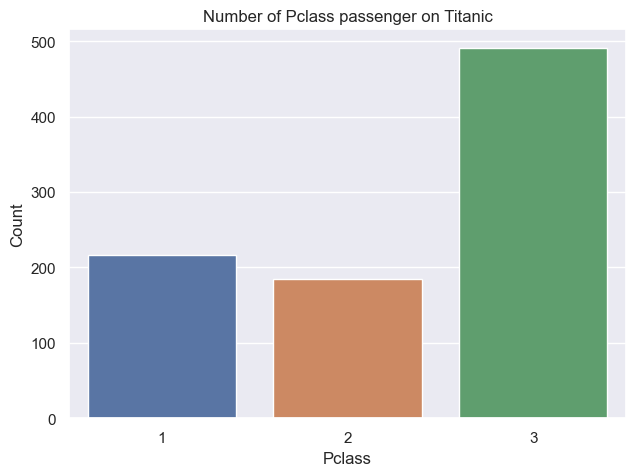

In [46]:
#now lets check for the pclass 
# lets make the count plot
sns.countplot(x='Pclass',data=df_survive)

plt.title("Number of Pclass passenger on Titanic")
plt.xlabel('Pclass')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

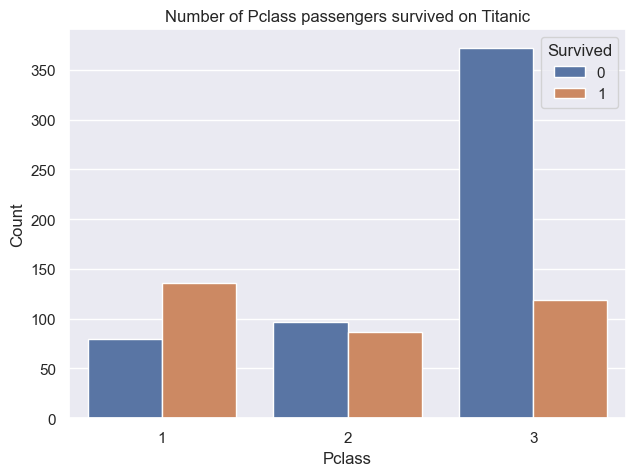

In [47]:
#now lets make countplot according to the Pclass of the passengers
sns.countplot(x='Pclass' , hue='Survived' , data=df_survive)

plt.title("Number of Pclass passengers survived on Titanic")
plt.xlabel('Pclass')
plt.ylabel('Count')


here we can observe that 1st class passengers survival rate is more thwen then the 2nd class and 3rd class which looks truly unfair 

Text(0, 0.5, 'Survived')

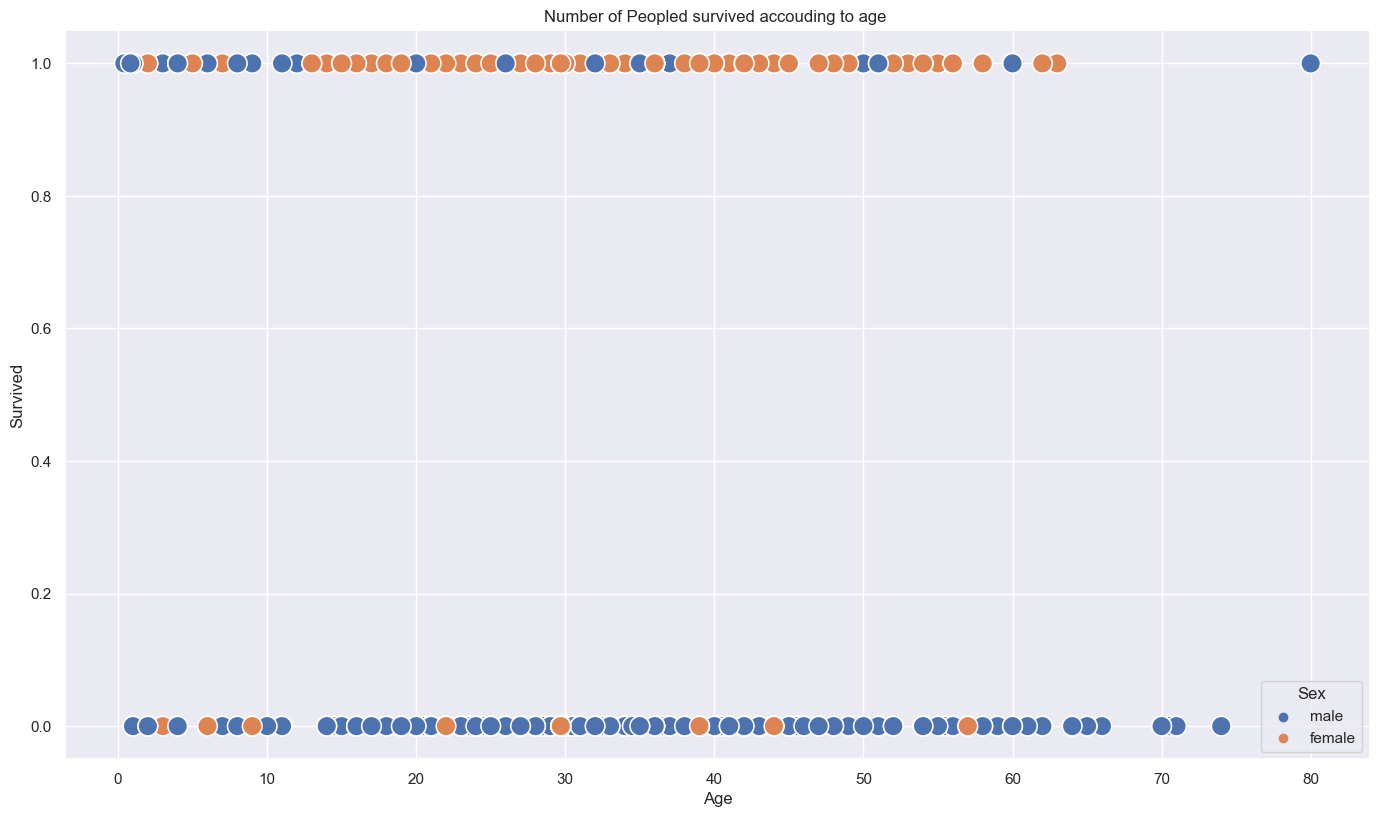

In [52]:
#now lets check for the Age 
# lets make the count plot
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x=df_survive.Age , y=df_survive.Survived, hue=df_survive.Sex, s=200)
plt.title('Number of Peopled survived accouding to age ')
plt.xlabel('Age')
plt.ylabel('Survived')

here we can observe that maximum male survival was below 12 and also after age 12 but in less quantity

Text(0, 0.5, 'Count')

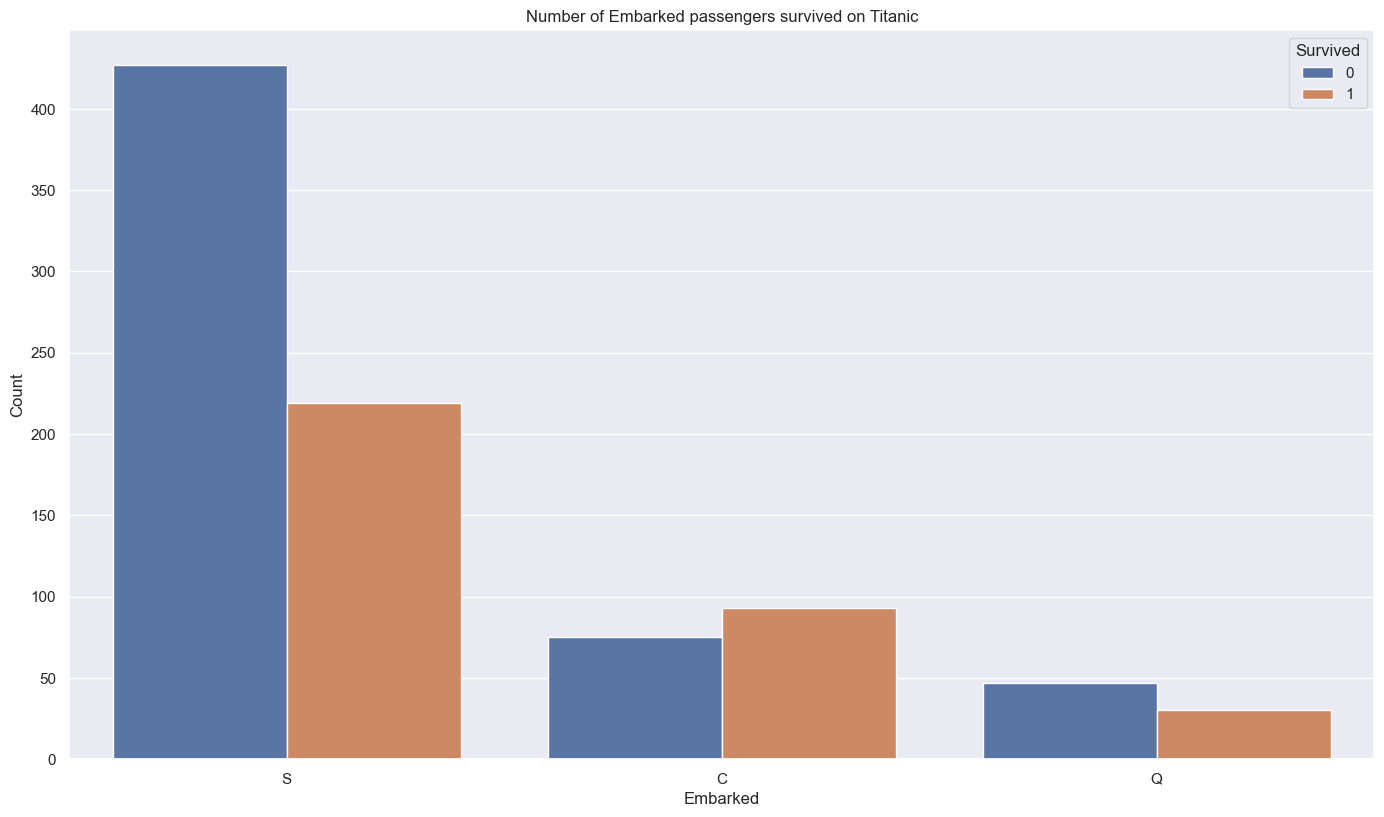

In [53]:
#now lets make countplot according to the Pclass of the passengers
sns.countplot(x='Embarked' , hue='Survived' , data=df_survive)

plt.title("Number of Embarked passengers survived on Titanic")
plt.xlabel('Embarked')
plt.ylabel('Count')


here we can see that from the S embarked maximum are the survivors and also the maximum are the death tolls are from that side but here we can observe that in "c "category death tolls are less as compared to surival rate

Separatiog numerical and catogorical columns

In [55]:
df_survive['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [56]:
df_survive['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [58]:
#converting the catogorical colunms
df_survive.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [59]:
df_survive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating the columns and target

In [63]:
x=df_survive.drop(columns=['Name','Ticket','PassengerId','Survived'], axis=1)
y=df_survive['Survive

In [64]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


Splitting the data in trianing and testing

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

here 80% data will be in x train and 20% data will be in x test

In [71]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


now lets train the model


Logistic Regression

In [72]:
# declaring the variable for Logistic Regression
model=LogisticRegression()



In [74]:
# training the logistic Regression model with training data
model.fit(x_train,y_train)

LogisticRegression()

In [75]:
 # accuracy on the training data
x_train_prediction=model.predict(x_train)

In [76]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [78]:
#let's find the accuracy of the model
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data',training_data_accuracy)

Accuracy score of training data 0.8075842696629213


In [79]:
# training the logistic Regression model with testing data
model.fit(x_test,y_test)

LogisticRegression()

In [80]:
 # accuracy on the testing data
x_test_prediction=model.predict(x_test)

In [83]:
#let's find the accuracy of the model
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy score of training data',test_data_accuracy)

Accuracy score of training data 0.770949720670391


here we can observe that both the accuracy of train model and test model are very near to each other and our model is not overfitted or underfitted